##### Authors: Robin Staudinger and Max Estlander

# *Challenging AutoML in Categorising Songs * 

## Abstract

In this project we explore how well machine learning can be used to categorize songs based on rythm, pitch and timbre of the songs. We also wanted to see how well a generalized tool, AutoML, could perfrom the task, and then we explored how much work it would take to beat AutoML. Without preprocessing and just giving the data as is h2o.ai's AutoML managed to get 65% correct , while we managed only slightly above 50%. However, after a lot of preprocessing of the data we managed to reach 64% with similar log loss numbers. We found that h2o.ai's AutoML is great for creating a benchmark and has very sophisticated methods for preprocessing and machine learning. It is a great way to find out if the target is worthwhile pursuing with data as is or if more data should be accuired. While we weren't able to beat the tool, we are confident that with more sophisticated preprocessing methods and more specialised combinations of algorithm it is better to do the work yourself and tailor the solution than defaulting to generalized tools. 





## 1. Introduction

In todays world everything is getting automated more and more. However, some tasks seem too hard to automate since it's difficult to make a rule set for how it should be done. Machine Learning is a great solution for this issue since it uses collected data to create an algorithm and find relationships within the data that it can use to then automatically categorize it or solve the task at hand. 

In this project we will be categorizing songs to different music genres. This is a difficult tasks since it is not obvious to which genre a song belongs to and songs can belong to multiple genres. There are no clearly defind rules or measurements but that's why using machine learning is a good solution to finding and defining those rules. The data set used for training the algorithm consists of 4363 songs. From each song 264 features have been extracted from the rythm (1-168), pitch (169-216) and timbre (217-264). The songs have been categorized to belong to only 1 of 10 different music genres.[1]  

Our goal is to challenge h2o.ai's AutoML tool [2][3] to try and categorize another set consisting of 6544 songs with the same features extracted. AutoML is a new tool that is promised to do the whole machine learning pipeline, i.e. you just give it a dataset to train on and you get a viable predictor. [4] In the project we hope to find out how viable the current AutoML tools are, that is do they actually do what they promise and how well. We will evaluate the amount of manual labour it would take match or even beat their performance. Additionally, we evaluate how well the skills learned during the course actually compare. 


## 2. Data analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from IPython.display import display

### Load and inspect the data

The data should be contained in the same folder as in the notebook is run.

In [2]:
# Load the data and combine into one dataframe
train_data = pd.read_csv('train_data.csv', header=None)
train_labels = pd.read_csv('train_labels.csv', header=None)

# give column names
train_labels.columns = ['labels']
train_data.columns = np.arange(0,264).astype(str)

In [3]:
# Same for the test data
test_data = pd.read_csv('test_data.csv', header=None)
test_data.columns = np.arange(0,264).astype(str)

Let's have a look at our training data:

In [4]:
#Analysis of the input data
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
count,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,...,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000
mean,3097.683714,4390.947408,3987.672465,4004.861996,3086.664978,3329.815872,3043.628357,3034.574066,2671.463266,2440.464016,...,0.148412,0.235156,0.099695,0.149826,0.079100,0.102965,0.070939,0.078456,0.070708,0.059353
std,1309.219331,1457.625815,1228.185868,1242.336635,1031.020501,1124.845689,1097.705493,1121.064034,1017.781965,970.028384,...,0.053224,0.102935,0.038655,0.057284,0.026279,0.030300,0.020456,0.022035,0.026422,0.018123
min,1.240000,3.565000,73.644000,147.370000,58.027000,136.670000,139.310000,157.260000,118.530000,130.150000,...,-0.013915,-0.013511,-0.022156,-0.046172,0.003606,0.005359,0.003377,0.011343,0.005302,-0.007228
25%,2200.900000,3386.150000,3128.650000,3173.200000,2373.000000,2551.050000,2264.800000,2233.150000,1923.200000,1727.650000,...,0.111165,0.148390,0.070612,0.109415,0.061715,0.081870,0.056992,0.062765,0.051641,0.046992
50%,3114.600000,4376.800000,3988.500000,3976.300000,3041.300000,3276.400000,2960.900000,2956.800000,2601.600000,2339.900000,...,0.144030,0.225000,0.097368,0.146210,0.075773,0.101270,0.069202,0.077442,0.066268,0.057879
75%,3949.150000,5391.900000,4814.950000,4795.300000,3741.400000,4055.700000,3769.100000,3758.100000,3347.200000,3089.950000,...,0.180845,0.325125,0.123075,0.187625,0.092576,0.121835,0.083009,0.093005,0.085709,0.069603
max,9172.400000,9062.500000,8318.100000,9342.200000,8275.700000,8169.500000,7547.600000,8262.200000,8667.900000,7549.300000,...,0.383050,0.485230,0.301290,0.352410,0.246010,0.235600,0.195000,0.170010,0.182180,0.149770


We can see that the values differ a lot in and between the categories, thus we will have to scale the data to make it more friendly to our predictors, this is done later in the preprocessing phase. Since there are so many features, we still cannot see all of the data in this phase.


Next we'll have a look at the distribution of the song categories in the training data:

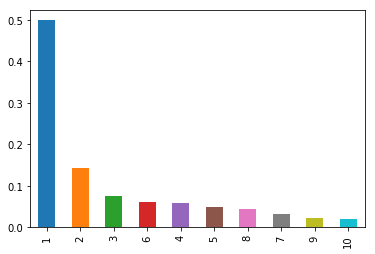

In [6]:
# Bar plot of class distribution
distribution  = train_labels['labels'].value_counts()
total = sum(distribution)
fraction = distribution / total
fraction.plot(kind='bar')

We can see that:


*   ca 50% of the songs are Pop_Rock
*   The labels are numbered in decreasing frequency



### Histograms and Data cleaning


Through a thorough research of the data we found some interesting characteristics, in this section we will show some of them, with the help of histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024333733DA0>,
      dtype=object)

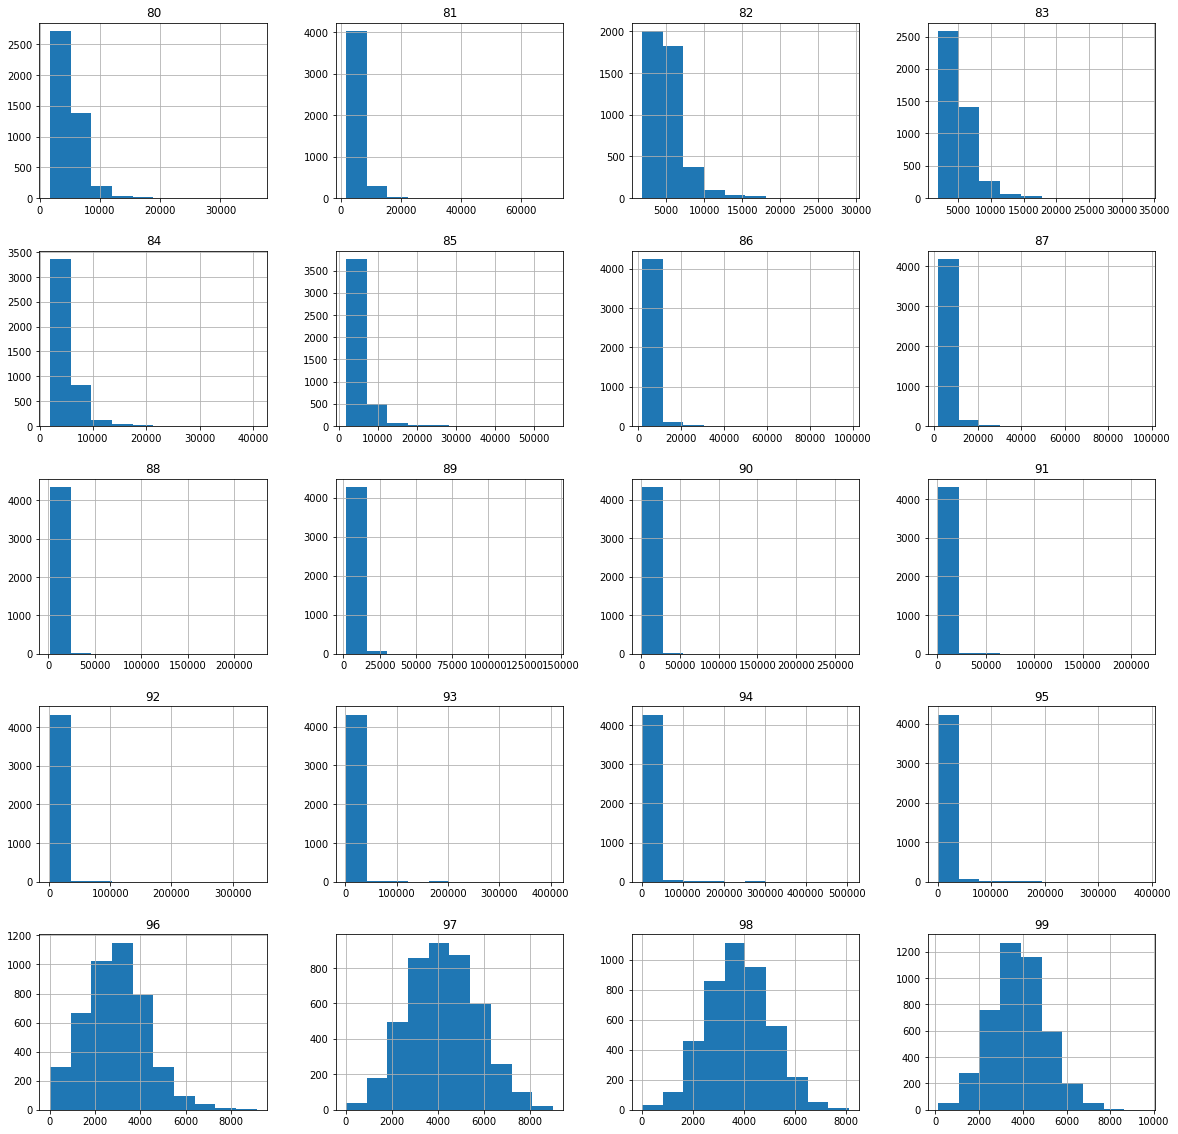

In [14]:
train_data.iloc[:,80:100].hist(figsize=[20,20])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7380c0cf98>,
      dtype=object)

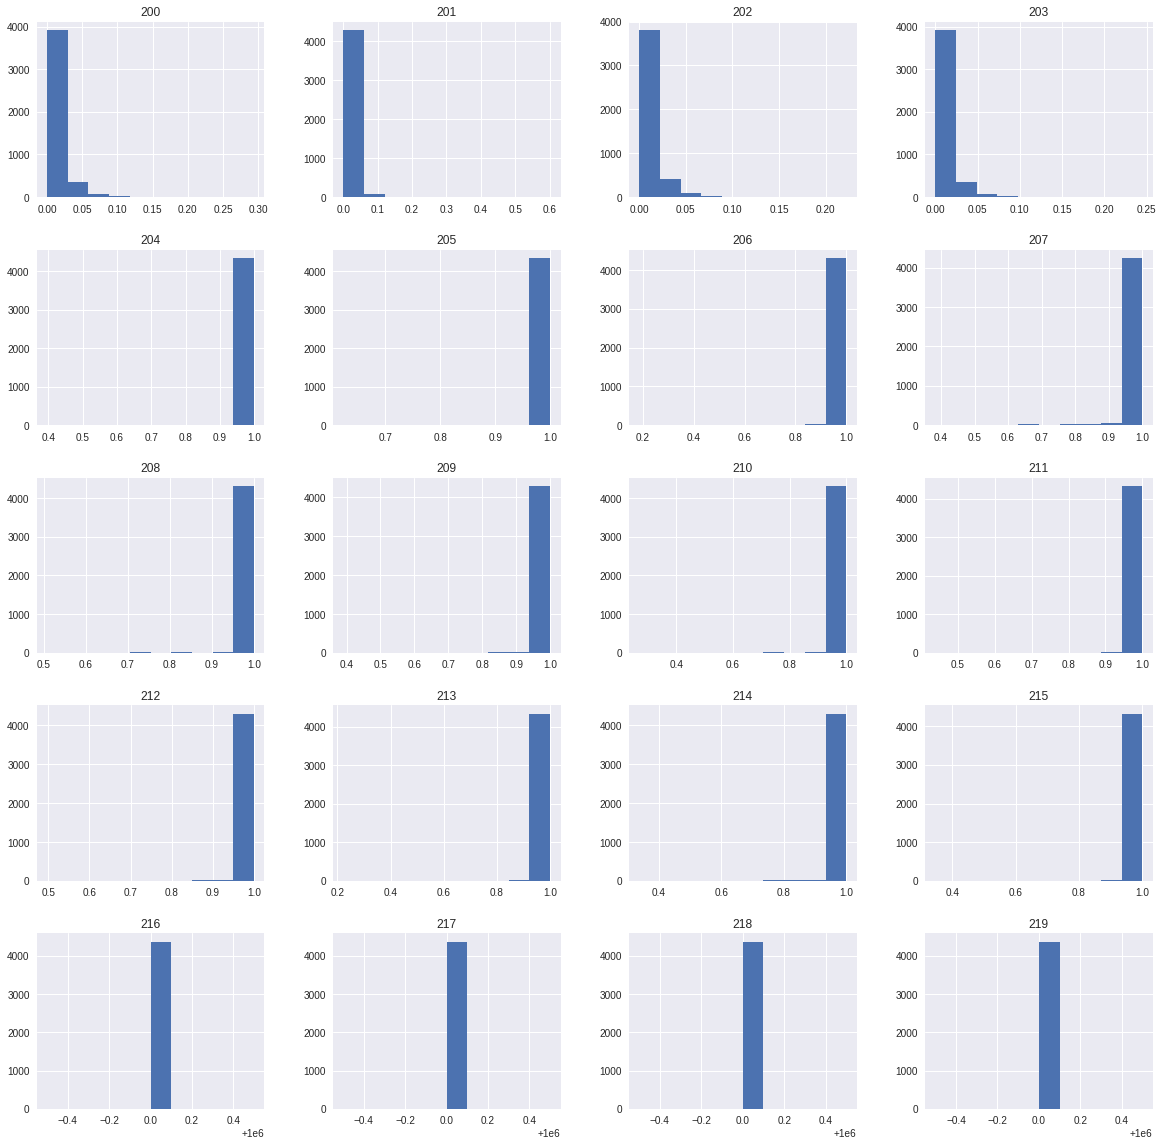

In [9]:
train_data.iloc[:,200:220].hist(figsize=[20,20])

From the histograms it can be noted that the data of features 80-95 and 200-219 is really poorly distributed, this is probably due to a high amount of duplicate values combined with outliers. These datapoints create a higher weight on the predictors and thus should be minimized in the dataset, in order to avoid bias.

In [46]:
# We find the columns with a lot of duplicate values
uniquevals = train_data.nunique()
notuniq = uniquevals[:] < 2000
del_cols = notuniq.index[notuniq[:]].tolist()

In [47]:
# Drop the dirty data columns from both datasets
train_data_clean = train_data.drop(columns = del_cols)
test_data_clean = test_data.drop(columns = del_cols)

For the next part of the cleaning procedure, we had to take to the beloved friend of every person: Excel.

We opened the training data in excel and found out that there were some double punctuation in some values in the dataset. Specifically, the data was corrupted with "1." before the actual value.

We'll proceed to fix these values:

In [68]:
# Replace the double punctuations with the correct value
train_data_clean.replace('1.0.', '0.')
train_data_clean.replace('1.1.', '1.')
train_data_clean.replace('1.2.', '2.')
train_data_clean.replace('1.3.', '3.')
train_data_clean.replace('1.4.', '4.')
train_data_clean.replace('1.5.', '5.')
train_data_clean.replace('1.6.', '6.')

# Do the same for the test set
train_data_clean.replace('1.0.', '0.')
train_data_clean.replace('1.1.', '1.')
train_data_clean.replace('1.2.', '2.')
train_data_clean.replace('1.3.', '3.')
train_data_clean.replace('1.4.', '4.')
train_data_clean.replace('1.5.', '5.')
train_data_clean.replace('1.6.', '6.')


# Check the new shape of the data
train_data_clean.shape

(4363, 228)

Finally, we can proceed with removing the outliers [5]:

(note: this cannot be done to the test data, since the submission file has to have all the rows)

In [49]:
# remove outliers with the help of zscore

from scipy import stats
df = pd.concat([train_data_clean, train_labels], axis=1)
df = df[(np.abs(stats.zscore(train_data_clean.iloc[df.index,:])) < 3.5).all(axis=1)]

train_data_clean_no = df.iloc[:,:-1]
train_labels_no = df.iloc[:,-1]

We can now plot the histograms again to see the differences in the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024330C89358>,
      dtype=object)

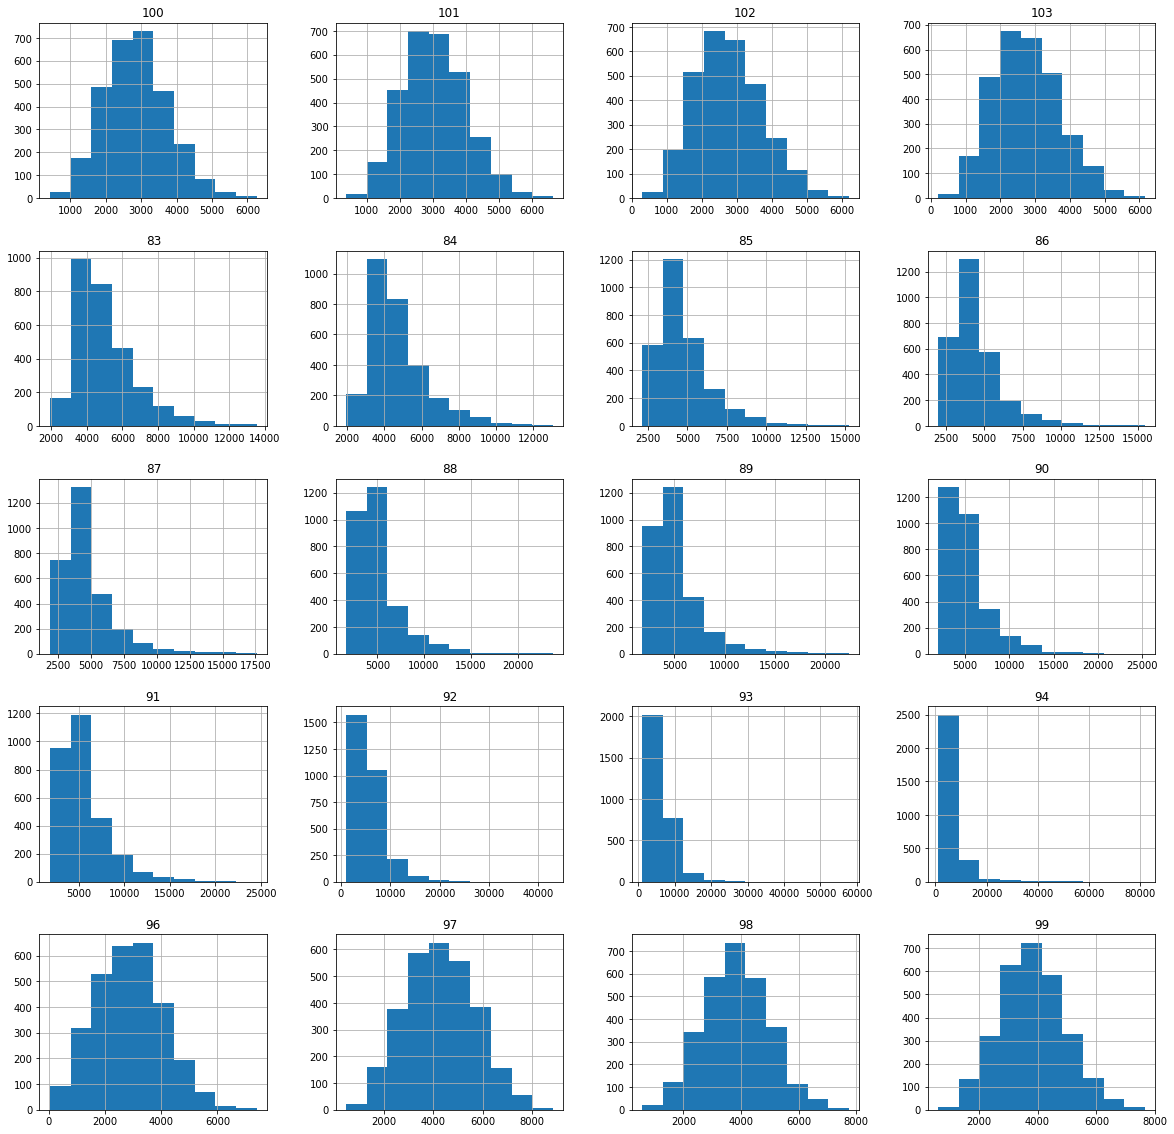

In [19]:
# Check the result
train_data_clean_no.iloc[:,80:100].hist(figsize=[20,20])

The plots look much better now, even though they are not perfect -  especially columns 92-95 are still pretty rough.

## 3. Methods and experiments

###  Our ML Pipeline:

For the challenging approaches we tried out Logistic Regression, Gradient Boosting Classifier and Support Vector Classifier from the SKLearn library. Additionally we trained a Deep Neural Net on Keras and semi supervised learning using Label Propagation from SKLearn, but were unable to find any significant results.

The best result was achieved by Logistic Regression with the accuracy of 64% on kaggle.


In [20]:
#Import sklearn libaries
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion

First we had to find the sweetspot of methods for scaling the data, dimensionality reduction as well as model selection.[6][7] We started off with plain brute force techniques, but as time went by. We thought there had to be an easier way, so we found grid search.

Below is a cell containing our search-space for the best solution. We did not run this at once, it is rather a summary of the methods we tried out. We do not recommend running this cell, since it most probably is highly time-costly and it's only meant to show our thought process. Therefore, we have proceeded to comment out the whole cell.

In [0]:
'''

X_train, X_test, y_train, y_test = train_test_split(train_data_clean_no, train_labels_no, test_size=0.3, random_state=0)

scalers_to_test = [preprocessing.QuantileTransformer(), preprocessing.Normalizer(), preprocessing.MinMaxScaler(), preprocessing.MaxAbsScaler()]
n_features_to_test = np.arange(70,111,10)
n_dimensions_to_test = np.arange(72,77)
models_to_test = [LogisticRegression(), GradientBoostingClassifier(), SVC(), LinearSVC()]

params = [
    {'scaler': scalers_to_test},
    {'skb_k': n_features_to_test},
    {'pca': n_dimensions_to_test},
    {'regressor': models_to_test}
        ]
        
gridsearch = GridSearchCV(pipe, params, verbose=1, cv=cv).fit(X_train, y_train)

'''

The after countless bruteforce and gridsearch runs, we ended up with the following pipe [8]:

In [43]:
# Let's create our pipe

pipe = Pipeline([
        ('scaler', preprocessing.MinMaxScaler(copy=True, feature_range=(0,1))),
        ('reduce_dim', FeatureUnion([("pca", PCA(n_components=75)),
                                     ("skb", SelectKBest(k=100))])),
        ('regressor', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))
         ])

Let's crossvalidate the pipeline on the data:

In [50]:
# crossvalidate the pipeline
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores = cross_val_score(pipe, train_data_clean_no , train_labels_no, cv=cv)

# Display mean accuracy and std from cv
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



Accuracy: 0.672 (+/- 0.01)


We chose to crossvalidate the pipeline since the normal train-test form of validating the data gave too varying results.

Our accuracy of 67% in the validation corresponds pretty well with the result of 64% on kaggle, but it seems like it is a little bit overfitted.

And then train the pipe and predict new labels:

In [53]:
# train the pipe on the training data
X_train, X_test, y_train, y_test = train_test_split(train_data_clean_no, train_labels_no, test_size=0.2, random_state=2)
pipe.fit(X_train , y_train)

# predict labels for the test data
y_hat = pipe.predict(test_data_clean)
loss = pipe.predict_proba(test_data_clean)


Convert the predicted array into a submission file for the accuracy competition.


In [54]:
# Ids of the predictions
idx = np.arange(1, len(test_data_clean)+1).astype(str)

idx = np.transpose(idx)

#CONVERT TO SUBMISSION FILE
predicts = y_hat[:].astype(str)
accuracy = np.column_stack([idx,predicts]).astype(str)

accuracy = np.row_stack([['Sample_id','Sample_label'], accuracy])

import csv

with open('accuracy_varmat.csv', 'w', newline='\n') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for val in accuracy:
        wr.writerow(val)

Convert the probability array into a submission file for the log_loss competition.

In [55]:
cert = loss.astype(str)

idx = np.arange(0, len(test_data)+1).astype(str)
idx[0] = 'Sample_id'
idx = np.transpose(idx)
classes = ['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_9', 'Class_10']
cert = np.row_stack([classes,cert])

log_loss = np.column_stack([idx,cert])

import csv

with open('loss_varmat.csv', 'w', newline='\n') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for val in log_loss:
        wr.writerow(val)
       

### The h2o.ai autoML approach:

The autoML is run on raw data, no preprocessing necessary.

AutoML score on the Kaggle accuracy competition: 65%.

Side note for the reviewer: The h2o library needs quite a lot of dependencies, as well as a JRE. Therefore the h2o.init() function is left commented. If you want to run the AutoML section, uncomment the line.

In [77]:
# Import libraries
import h2o
from h2o.automl import H2OAutoML

# Setup the h2o VM
#h2o.init() # uncomment to run the autoML section

In [62]:
# Convert our dataframe to h2oFrame
df = pd.concat([train_data, train_labels], axis =1)
h2o_df = h2o.H2OFrame(df)
h2o_df['labels'] = h2o_df['labels'].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [63]:
# Define the label column
y = 'labels'

In [66]:
# Run AutoML for 300 seconds
aml = H2OAutoML(max_runtime_secs = 300)
aml.train(y = y, training_frame = h2o_df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [67]:
# Show the best performing ML algo's
lb = aml.leaderboard
lb

model_id,mean_per_class_error,logloss,rmse,mse
StackedEnsemble_BestOfFamily_0_AutoML_20181102_162333,0.6357,1.12197,0.588325,0.346127
StackedEnsemble_AllModels_0_AutoML_20181102_162333,0.635863,1.12046,0.588454,0.346278
GLM_grid_0_AutoML_20181102_162333_model_0,0.638613,1.10526,0.587701,0.345392
GBM_grid_0_AutoML_20181102_162333_model_0,0.731446,1.26394,0.610076,0.372193
GBM_grid_0_AutoML_20181102_162333_model_1,0.739979,1.5298,0.742974,0.55201
DRF_0_AutoML_20181102_162333,0.753922,1.69953,0.651931,0.425014
XRT_0_AutoML_20181102_162333,0.75714,1.86182,0.652953,0.426347
DRF_0_AutoML_20181102_162220,0.75988,1.86284,0.653207,0.426679


In [69]:
# Import test data and make predictions using the best performing model
test_data_h2o = h2o.H2OFrame(test_data)
y_hat_h2o = aml.leader.predict(test_data_h2o)

Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [70]:
# Ids of the predictions
idx = np.arange(0, len(test_data)+1).astype(str)
idx[0] = 'Sample_id'
idx = np.transpose(idx)

In [71]:
# Convert predictions into correct format (ACCURACY)
# Predictions
predicts = y_hat_h2o[:,0]
predicts.col_names = ['Sample_label']
predicts = predicts.as_data_frame().as_matrix().astype(str)
predicts = np.row_stack([['Sample_label'],predicts])

accuracy = np.column_stack([idx,predicts])

In [72]:
# log loss
cert = y_hat_h2o[:,1:]
cert = cert.as_data_frame().as_matrix().astype(str)
classes = ['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_9', 'Class_10']
cert = np.row_stack([classes,cert])

log_loss = np.column_stack([idx,cert])

In [74]:
# Save result into submission file (change variables depending on submission acc/loss)
import csv

with open('h2o_acc_varmat.csv', 'w', newline='\n') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for val in accuracy:
        wr.writerow(val)

## 4. Results


### Performance comparison

#### Training

* On our test data our solution had 65% accuracy and 1.09 LogLoss. 
* AutoML 1.12 LogLoss on crossvalidation, we were unable to extract the accuracy.

#### Kaggle
* Our solution had 64.1% accuracy on kaggle with 0.183 LogLoss.
* AutoML solution had 65.8% accuracy with 0.172 LogLoss. 



In [57]:
from sklearn.metrics import log_loss, accuracy_score
test_y_hat = pipe.predict(X_test)
test_y_pred = pipe.predict_proba(X_test)

test_acc = accuracy_score(y_test, test_y_hat)
test_loss = log_loss(y_test, test_y_pred)

print("Accuracy: %0.3f" % test_acc)
print("LogLoss: %0.3f" % test_loss)

Accuracy: 0.650
LogLoss: 1.090


The high numbers of LogLoss, might be due to some incompability with the scoring algorithms. Or then 1 should be subtracted from the result.

### Confusion Matrices

#### Traditional

In [58]:
# Confusion matrix and scores
from sklearn.metrics import classification_report, confusion_matrix

y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))



[[274   9   1   5   2   3   1   1   0   1]
 [ 27  36   4   2   0   0   0   0   0   0]
 [  7   1  27   0   2   0   0   0   0   0]
 [ 18   4   0  19   1   0   0   0   0   0]
 [ 15   4   1   2   6   4   0   0   0   1]
 [ 12   4   2   2   1   4   0   0   1   1]
 [ 14   2   1   1   2   4   0   0   1   1]
 [ 17   1   0   1   1   0   0   5   0   0]
 [  1   0   2   0   2   1   0   1   4   0]
 [  9   0   0   1   0   0   0   0   0   0]]
             precision    recall  f1-score   support

          1       0.70      0.92      0.79       297
          2       0.59      0.52      0.55        69
          3       0.71      0.73      0.72        37
          4       0.58      0.45      0.51        42
          5       0.35      0.18      0.24        33
          6       0.25      0.15      0.19        27
          7       0.00      0.00      0.00        26
          8       0.71      0.20      0.31        25
          9       0.67      0.36      0.47        11
         10       0.00      0.00      

From the confusion matrix, we can clearly see that categories 7 and 10 were our biggest weak spots, since we didnt manage to categorize a single song correctly into those categories. We can also see the effect the major shift in samples favored to category 1. Since most errors are due to categorizing into that category.

#### h2o.ai AutoML


In [75]:
# Confusion matrix
aml.leader.confusion_matrix(h2o_df)

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,7,8,9,10,Error,Rate
2071.0,46.0,9.0,9.0,12.0,19.0,1.0,10.0,1.0,0.0,0.0491276,107 / 2Â 178
67.0,533.0,10.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,0.1375405,85 / 618
20.0,8.0,289.0,1.0,0.0,6.0,0.0,0.0,2.0,0.0,0.1134969,37 / 326
11.0,4.0,0.0,234.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0750988,19 / 253
89.0,5.0,4.0,10.0,97.0,5.0,1.0,2.0,1.0,0.0,0.5467290,117 / 214
17.0,1.0,2.0,3.0,4.0,231.0,0.0,2.0,0.0,0.0,0.1115385,29 / 260
40.0,51.0,1.0,2.0,3.0,2.0,41.0,1.0,0.0,0.0,0.7092199,100 / 141
24.0,0.0,1.0,0.0,0.0,0.0,0.0,170.0,0.0,0.0,0.1282051,25 / 195
6.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0,80.0,0.0,0.1304348,12 / 92
11.0,0.0,0.0,4.0,1.0,0.0,7.0,0.0,1.0,62.0,0.2790698,24 / 86


The AutoML model seems to have problems with classes 5 and 7, with error rates of 0.54 and 0.7 accordingly.

## 5. Discussion/Conclusions


We did not manage to beat the AutoML tool which got a 65% accuracy. However, we managed to almost match it with 64%. It required a lot of manual preprocessing of the data and trying out different algorithms to find out which was best suited for our task. The data was not perfect, but simulated more of a real life situation. The percentages are still low, leading us the conclusion that maybe the extracted features weren't optimal for determining the songs genre and perharps there could be other factors to consider for this task.

What we especially learned was that the preprocessing and removal of outliers, had a huge difference when it came to overfitting. Without proper preprocessing our Kaggle score was >10% lower than the accuracy extracted from testing on the training data.

While accuracy might be the most interesting metric simply because it's easy to understand and shows how succesful something is doesn't mean it's the only thing that should be measured or followed. Logloss is important to keep an eye on to see how well and or close the algorithm is. To see if it was sure when it picked right or if it got lucky. While a high accuracy is desired, if it is accompanied with a high logloss than the algorithm will not be as good as the accuracy might make you think. 

In future research it would be worthwhile to consider other aspects of songs, such as word count and repetition, if you want to improve the correct percentage. Finding more data points that are not correlated with each other helps machine learning create a better algorithm for predicting labels. Lables could also be something to investigate as it's not evident that a song is actually in the genre it's labeled as. Considering a data set where songs are able to belong to multiple genres might also yield interesting results, since songs aren't always strictly belonging to one category. Also it should be noted that almost 50% of our training data was categorized as belonging to one genre. In future research a more even class distribution might make the algorithm better at finding the actual genre instead of being weigheted towards one very heavily. [9] Our solution performed very poorily in recognizing the less represented genres.

How we used the data could also be improved. Finding more systematic solution and not relying on bruteforcing or manual inspection could filter out possible human errors. The machine learning itself could be improved by trying to use an ensamble of algorithms instead of just one alogrithm. 


We found AutoML to be a very viable solution as we weren't able to beat it. However, we came close to matching it after inspeting it and preprocessing the data carefully. Interestingly enough when we used AutoML on the data we had preprocessed, it gave a worse result than when given the raw data (65% raw compared to 63% when preprocessed by us). However, we believe there were improvements to be done in our solution and it is definetly possible to beat generalized tools such as AutoML with a more tailored solution. It is however a great solution for researching if a dataset is capable of being used in machine learning. It is also a good benchmark to show whether your preprocessing and predictors should be improved or if you should improve your dataset. 

As for the knowledge acquired during the course, we think the fundamentals were useful in understanding the process of the classification. However, we did have to learn and apply a lot of new techniques during the course of completing the project. That being said, we've got a good foundation to build on, which we think was the goal of the course.

## 6. References


[1]

Data-set from:
Thierry Bertin-Mahieux, Daniel P.W. Ellis, Brian Whitman, and Paul Lamere. 
The Million Song Dataset. In Proceedings of the 12th International Society
for Music Information Retrieval Conference (ISMIR 2011), 2011.

Labels from:
AllMusic.com

[2] http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#

[3] https://www.youtube.com/watch?v=42Oo8TOl85I

[4] https://medium.com/iotforall/automl-promises-vs-reality-850759f2564a

[5] https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

[6] https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

[7] https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/

[8] https://iaml.it/blog/optimizing-sklearn-pipelines

[9] https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/



